## Backtracking - Problema de las 4 reinas en 4x4

¡Buenas tardes compañeros! 

Como aportación al foro quería probar el problema que vimos en clase relacionado con la técnica de vuelta atrás o Backtracking. Como vimos, el backtracking es una técnica para construir sistemáticamente todas las soluciones posibles de un problema, representadas como una tupla (𝑥1,𝑥2,…,𝑥𝑛), donde cada componente 𝑥𝑖 se explora en la etapa correspondiente. Se modela mediante un árbol de expansión, donde cada nodo representa un posible valor para 𝑥𝑖. Esta técnica permite descartar ramas mediante criterios de ramificación y poda, evitando análisis por fuerza bruta.

El problema consiste en colocar en un tablero 4 reinas sin que se amenacen.

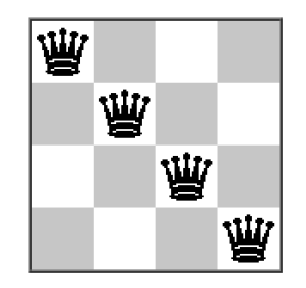

En ajedrez, que las reinas se amenacen significa que cumplen con alguna de las siguientes condiciones: 
- **Misma fila:** Si dos reinas están en la misma fila, se amenazan entre sí.
- **Misma columna:** Si dos reinas están en la misma columna, también se amenazan.
- **Misma diagonal:** Si dos reinas están en la misma diagonal (ascendente o descendente), se pueden capturar mutuamente. Esto ocurre si:
    - La diferencia entre las coordenadas x e y de ambas reinas es igual (diagonal descendente).
    - La suma de las coordenadas x+y es igual (diagonal ascendente).
    - Se verifica para cada par de columnas i y j: |xi-xj|!=|i-j|


Para resolver el problema vimos que se utilizaban 4 tuplas (x1,x2,x3,x4), que representan las 4 columnas del tablero y donde el valor de cada elemento es la fila donde está
posicionada la reina en la columna i-esima. P.ej la del dibujo es (1,2,3,4). El árbol de expansión recorre todas las posibilidades para determinar si una solución parcial (rama del árbol) es “prometedora”. 

El esquema del árbol sería de la siguiente forma: 

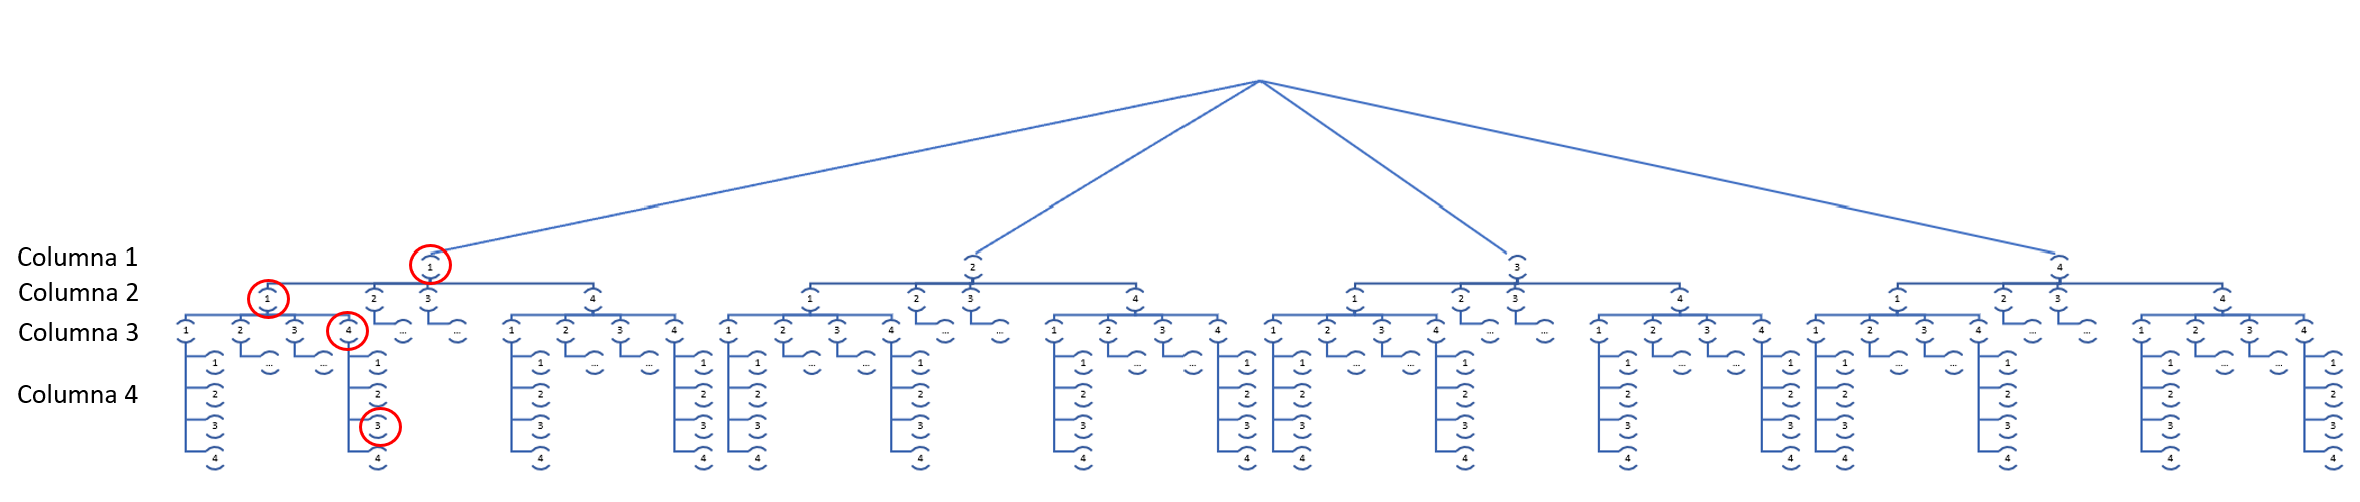

Como vemos, tenemos un total de 4+16+64+256=340 nodos o ramas. Gracias al método de backtracking la mayoría de estas ramas son descartadas, de forma que se reduce considereablemente el número de nodos explorados para dar con la solución. 

En rojo he marcado un ejemplo, **(1,1,4,3)**, cuyo correspondiente tablero sería:
- Columna 1, fila 1
- Columna 2, fila 1
- Columna 3, fila 4
- Columna 4, fila 3

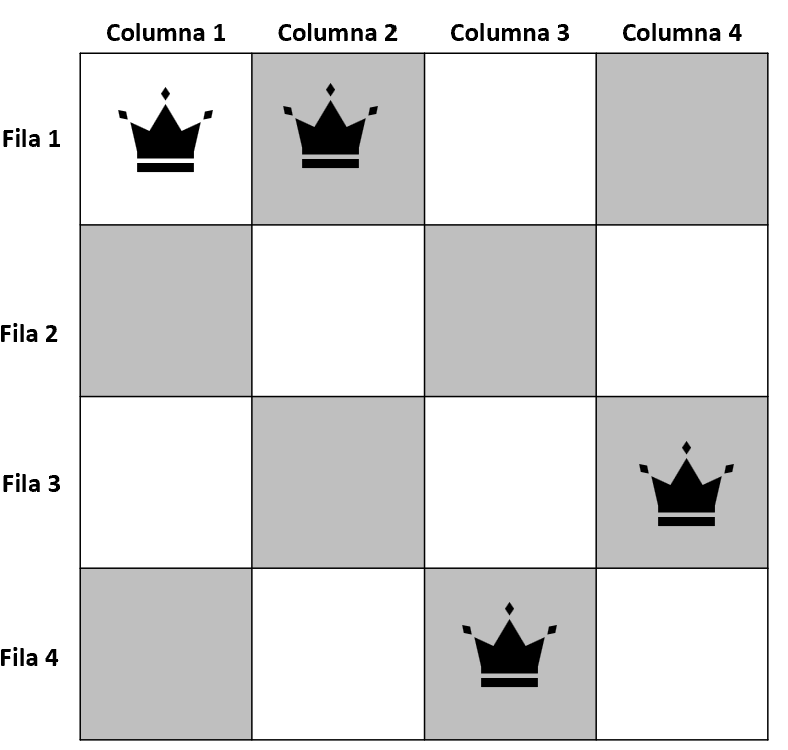

Esta solución no sería válida, ya que tenemos dos reinas en la misma fila y dos reinas en diagonal. 

En la siguiente tabla se resumen el número de soluciones para este problema en función del tamaño del tablero nxn, de forma que en nuestro caso tenemos un tablero de n=4, con un espacio de soluciones de 4!=24 (soluciones únicas) y un total de 2 soluciones válidas.  

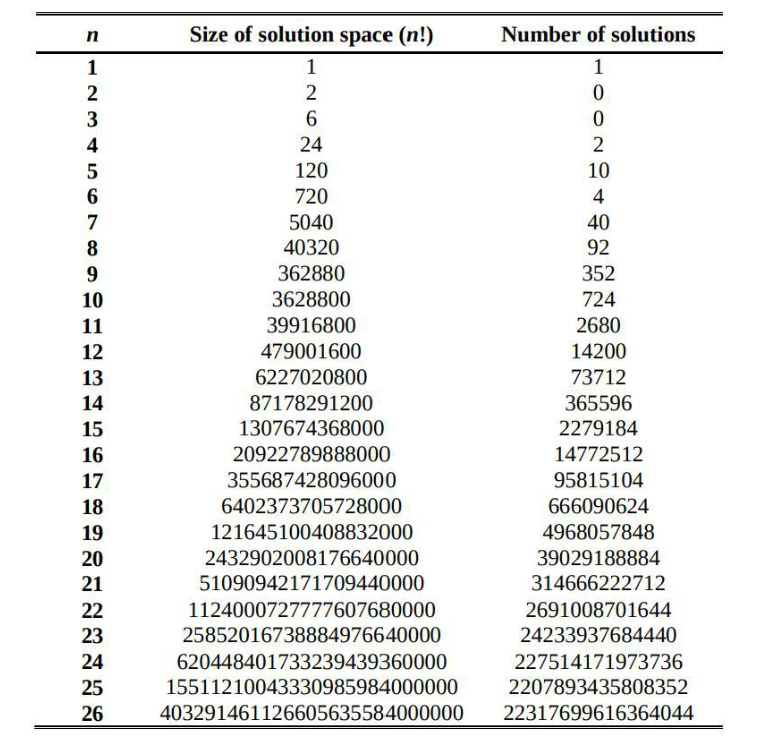

Ahora sí, voy a mostrar la propuesta del algoritmo que he encontrado para resover este problema. Concretamente lo he visto en un trabajo de Fin de Grado de la Universidad Rey Juan Carlos del curso 2022-2023 y lo he escogido porque he visto que hay diferentes formas de plantearlo pero este me ha parecido sencillo de comprender. Dejo por aquí el enlace a este TFG: https://burjcdigital.urjc.es/items/e39b398c-8174-4d5b-8014-05b357e6c83b



El código es el siguiente: 

In [14]:
def n_reinas(n):
    # Se inicializan los arreglos de filas, diagonales principales y diagonales secundarias
    solucion = [-1] * n  # Arreglo para las posiciones de las reinas en las columnas
    f = [True] * n  # Indica si una fila está disponible
    dp = [True] * (2 * n - 1)  # Diagonales principales
    ds = [True] * (2 * n - 1)  # Diagonales secundarias
    
    # Variable para contar las soluciones
    num_soluciones = 0

    # Función para imprimir la solución
    def imprimir(solucion):
        nonlocal num_soluciones
        num_soluciones += 1
        print(solucion)

    # Función recursiva para colocar las reinas
    def buscarReinas(n, i, solucion, f, dp, ds):
        for j in range(n):
            # Verificamos si podemos colocar una reina en la fila y columna actuales
            if f[j] and dp[i - j + n - 1] and ds[i + j]:
                # Colocamos la reina en la posición (fila, columna)
                solucion[i] = j
                # Marcamos la fila y las diagonales como ocupadas
                f[j] = False
                dp[i - j + n - 1] = False
                ds[i + j] = False
                
                # Si hemos colocado todas las reinas, imprimimos la solución
                if i == n - 1:
                    imprimir(solucion)
                else:
                    # Llamamos recursivamente para colocar la siguiente reina
                    buscarReinas(n, i + 1, solucion, f, dp, ds)
                
                # Deshacemos el movimiento (backtrack)
                f[j] = True
                dp[i - j + n - 1] = True
                ds[i + j] = True

    # Llamamos a la función recursiva para empezar con la columna 0
    buscarReinas(n, 0, solucion, f, dp, ds)

    # Imprimimos el número total de soluciones encontradas
    print(f"Existen {num_soluciones} soluciones")

# Ejemplo: Resolver el problema de las 4 reinas
n = 4
n_reinas(n)


[1, 3, 0, 2]
[2, 0, 3, 1]
Existen 2 soluciones


En este caso, se utiliza la técnica de backtracking con poda. Sin embargo he encontrado otro tipo de solución sin recurrir a la poda, sino que unicamente se hace una validación directa de las posiciones de las reinas. Este método se explica en el artículo "Técnicas de resolución de problemas de satisfacción de restricciones" (https://www.researchgate.net/publication/28076126_Tecnicas_de_resolucion_de_problemas_de_satisfaccion_de_restricciones)


In [17]:
def n_reinas(n):
    # Lista que representará el tablero
    soluciones = []
    
    def es_valida(solucion, fila, columna):  # Verifica si es válida colocar una reina en la fila y columna dadas.No debe haber otra reina en la misma 
        #fila o en la misma diagonal.
        
        for i in range(columna):
            # Verificar si hay una reina en la misma fila o en la misma diagonal
            if solucion[i] == fila or abs(solucion[i] - fila) == abs(i - columna):
                return False
        return True
    
    def buscarReinas(columna, solucion): #colocar una reina en cada columna. Si se han colocado reinas en todas las columnas, la solución es válida.
        
        if columna == n:
            # Si hemos colocado todas las reinas, agregamos la solución
            soluciones.append(solucion[:])
            return
        
        for fila in range(n):
            if es_valida(solucion, fila, columna):
                # Colocamos la reina en la posición (fila, columna)
                solucion[columna] = fila
                # Llamamos recursivamente para colocar la siguiente reina
                buscarReinas(columna + 1, solucion)
                # Volver atrás (backtrack) no es necesario ya que sobrescribimos la solución
    
    # Inicializamos el arreglo para la solución y comenzamos desde la columna 0
    buscarReinas(0, [-1] * n)
    
    # Imprimir todas las soluciones encontradas
    print(f"Existen {len(soluciones)} soluciones")
    for sol in soluciones:
        print(sol)

# Ejemplo: Resolver el problema de las 4 reinas
n = 4
n_reinas(n)


Existen 2 soluciones
[1, 3, 0, 2]
[2, 0, 3, 1]


En ambos algortimos podemos modificar el valor de n, para alterar el tamaño del tablero y comprobar que el número de soluciones válidas es el que se encuentra en la tabla adjuntada anteriormente. 

Como vemos, parece que con ambos algoritmos encontramos la misma solución a pesar de ser diferentes. Y vosotros compañeros, ¿Qué método créeis que es más eficiente para resolver este problema? ¿Habéis visto algún otro algoritmo que lo resuelva? Estaré atenta a vuestras respuestas u otras entradas en el foro sobre este tema. Espero se haya entendido y os sirva de ayuda. Saludos!
